In [1]:
# DSCI 100 Group 29 Project Proposal

In [2]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
#read the csv file and rename the columns.

dry_bean <-read_csv("dry_bean_dataset.csv", col_names=FALSE, skip=1) |>
           rename( "area" = X1,
                   "perimeter" = X2,
                   "major_axis_length" = X3,
                   "minor_axis_length" = X4,
                   "aspect_ration" = X5,
                   "eccenticity" = X6,
                   "convex_area" = X7,
                   "equiv_diameter" = X8,
                   "extent" = X9,
                   "solidity" = X10,
                   "roundness" = X11,
                   "compactness" = X12,
                   "shape_factor_1" = X13,
                   "shape_factor_2" = X14,
                   "shape_factor_3" = X15,
                   "shape_factor_4" = X16,
                   "class" = X17) 

dry_bean

Rows: 13611 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): X17
dbl (16): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


area  perimeter major_axis_length minor_axis_length aspect_ration
1     28395 610.291   208.1781          173.8887          1.197191     
2     28734 638.018   200.5248          182.7344          1.097356     
3     29380 624.110   212.8261          175.9311          1.209713     
4     30008 645.884   210.5580          182.5165          1.153638     
5     30140 620.134   201.8479          190.2793          1.060798     
6     30279 634.927   212.5606          181.5102          1.171067     
7     30477 670.033   211.0502          184.0391          1.146768     
8     30519 629.727   212.9968          182.7372          1.165591     
9     30685 635.681   213.5341          183.1571          1.165852     
10    30834 631.934   217.2278          180.8975          1.200834     
11    30917 640.765   213.5601          184.4399          1.157885     
12    31091 638.558   210.4863          188.3268          1.117665     
13    31107 640.594   214.6485          184.9693          1.160455     
14    31158 642.626   216.4848          183.6443          1.178827     
15    31158 641.105   212.0670          187.1930          1.132879     
16    31178 636.888   212.9759          186.5621          1.141582     
17    31202 644.454   215.6407          184.4717          1.168964     
18    31203 639.782   215.0677          184.8749          1.163315     
19    31272 638.666   212.4503          187.5359          1.132851     
20    31335 635.011   216.7901          184.1634          1.177161     
21    31374 636.401   219.8654          182.0089          1.207993     
22    31530 638.857   213.7857          188.0665          1.136756     
23    31573 674.103   217.3070          185.4483          1.171793     
24    31637 656.711   229.7193          175.5104          1.308864     
25    31675 657.431   236.7526          171.2106          1.382816     
26    31682 646.721   210.0457          192.2484          1.092574     
27    31703 656.305   215.7089          187.2724          1.151845     
28    31748 641.826   219.7765          184.1151          1.193691     
29    31768 650.954   220.9595          183.2921          1.205505     
30    31811 642.092   223.9847          180.9171          1.238051     
⋮     ⋮     ⋮         ⋮                 ⋮                 ⋮            
13582 41811 757.030   287.1111          185.6944          1.546148     
13583 41826 772.831   294.5868          181.3122          1.624749     
13584 41837 764.055   292.4191          182.7281          1.600296     
13585 41855 759.913   283.9315          188.2668          1.508134     
13586 41863 763.785   281.5965          190.2356          1.480251     
13587 41875 760.096   287.8178          185.5869          1.550852     
13588 41888 789.822   299.2714          179.5341          1.666934     
13589 41889 784.724   294.5590          181.5758          1.622237     
13590 41941 770.196   292.6199          183.3621          1.595858     
13591 41962 755.945   286.8704          186.5889          1.537446     
13592 41964 756.887   287.1641          186.2711          1.541646     
13593 41966 746.121   273.5087          195.4492          1.399385     
13594 41979 757.238   272.5799          196.5807          1.386606     
13595 41992 763.279   293.2241          182.8795          1.603373     
13596 41995 765.763   284.0732          188.5920          1.506285     
13597 42008 759.454   280.3327          191.2181          1.466036     
13598 42008 773.158   294.4922          181.8474          1.619447     
13599 42012 778.043   297.9128          179.7118          1.657725     
13600 42023 746.715   272.9627          196.3340          1.390297     
13601 42026 751.050   278.0711          192.9568          1.441106     
13602 42042 771.515   288.0827          186.3471          1.545947     
13603 42047 768.936   292.9750          183.1391          1.599740     
13604 42049 770.185   290.1634          185.0517          1.568013     
13605 42070 763.489   289.0224          186.12

In [4]:
#mutate the class vector to change the type of data from character <chr> to <fct>

dry_bean_tidy <- dry_bean |>
                 mutate(class = as_factor(class))

dry_bean_tidy

area  perimeter major_axis_length minor_axis_length aspect_ration
1     28395 610.291   208.1781          173.8887          1.197191     
2     28734 638.018   200.5248          182.7344          1.097356     
3     29380 624.110   212.8261          175.9311          1.209713     
4     30008 645.884   210.5580          182.5165          1.153638     
5     30140 620.134   201.8479          190.2793          1.060798     
6     30279 634.927   212.5606          181.5102          1.171067     
7     30477 670.033   211.0502          184.0391          1.146768     
8     30519 629.727   212.9968          182.7372          1.165591     
9     30685 635.681   213.5341          183.1571          1.165852     
10    30834 631.934   217.2278          180.8975          1.200834     
11    30917 640.765   213.5601          184.4399          1.157885     
12    31091 638.558   210.4863          188.3268          1.117665     
13    31107 640.594   214.6485          184.9693          1.160455     
14    31158 642.626   216.4848          183.6443          1.178827     
15    31158 641.105   212.0670          187.1930          1.132879     
16    31178 636.888   212.9759          186.5621          1.141582     
17    31202 644.454   215.6407          184.4717          1.168964     
18    31203 639.782   215.0677          184.8749          1.163315     
19    31272 638.666   212.4503          187.5359          1.132851     
20    31335 635.011   216.7901          184.1634          1.177161     
21    31374 636.401   219.8654          182.0089          1.207993     
22    31530 638.857   213.7857          188.0665          1.136756     
23    31573 674.103   217.3070          185.4483          1.171793     
24    31637 656.711   229.7193          175.5104          1.308864     
25    31675 657.431   236.7526          171.2106          1.382816     
26    31682 646.721   210.0457          192.2484          1.092574     
27    31703 656.305   215.7089          187.2724          1.151845     
28    31748 641.826   219.7765          184.1151          1.193691     
29    31768 650.954   220.9595          183.2921          1.205505     
30    31811 642.092   223.9847          180.9171          1.238051     
⋮     ⋮     ⋮         ⋮                 ⋮                 ⋮            
13582 41811 757.030   287.1111          185.6944          1.546148     
13583 41826 772.831   294.5868          181.3122          1.624749     
13584 41837 764.055   292.4191          182.7281          1.600296     
13585 41855 759.913   283.9315          188.2668          1.508134     
13586 41863 763.785   281.5965          190.2356          1.480251     
13587 41875 760.096   287.8178          185.5869          1.550852     
13588 41888 789.822   299.2714          179.5341          1.666934     
13589 41889 784.724   294.5590          181.5758          1.622237     
13590 41941 770.196   292.6199          183.3621          1.595858     
13591 41962 755.945   286.8704          186.5889          1.537446     
13592 41964 756.887   287.1641          186.2711          1.541646     
13593 41966 746.121   273.5087          195.4492          1.399385     
13594 41979 757.238   272.5799          196.5807          1.386606     
13595 41992 763.279   293.2241          182.8795          1.603373     
13596 41995 765.763   284.0732          188.5920          1.506285     
13597 42008 759.454   280.3327          191.2181          1.466036     
13598 42008 773.158   294.4922          181.8474          1.619447     
13599 42012 778.043   297.9128          179.7118          1.657725     
13600 42023 746.715   272.9627          196.3340          1.390297     
13601 42026 751.050   278.0711          192.9568          1.441106     
13602 42042 771.515   288.0827          186.3471          1.545947     
13603 42047 768.936   292.9750          183.1391          1.599740     
13604 42049 770.185   290.1634          185.0517          1.568013     
13605 42070 763.489   289.0224          186.12

In [5]:
#group and summarize to find how many beans exist in each class.

dry_bean_summarize <- dry_bean_tidy |>
                      group_by(class) |>
                      summarize(count= n())

dry_bean_summarize

class    count
1 SEKER    2027 
2 BARBUNYA 1322 
3 BOMBAY    522 
4 CALI     1630 
5 HOROZ    1928 
6 SIRA     2636 
7 DERMASON 3546

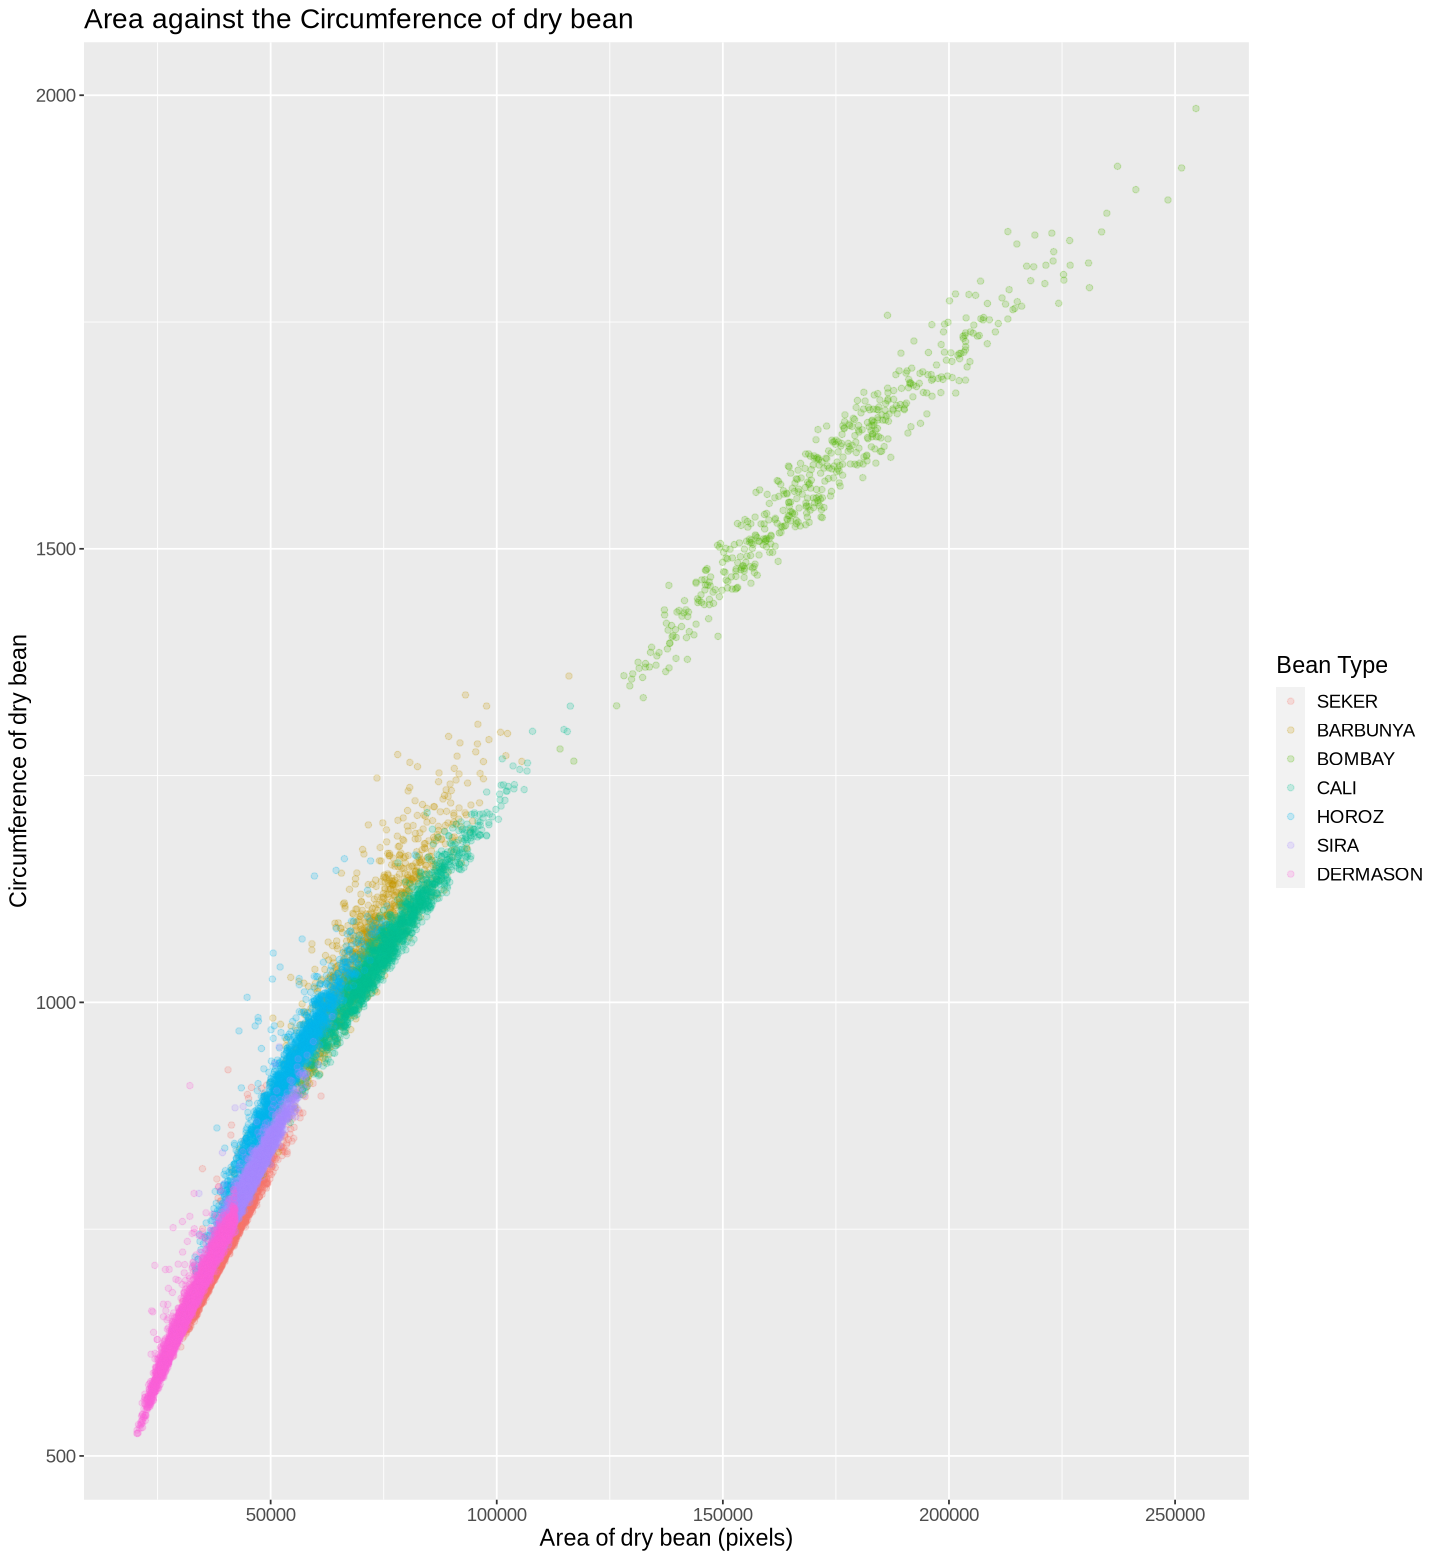

In [6]:
#Plot a graph of perimeter against area and color according to class.

options(repr.plot.width = 12 , repr.plot.height = 13 )

dry_bean_plot_1 <- dry_bean_tidy |>
                   ggplot( aes(x = area , y = perimeter , color = class)) +
                   geom_point( alpha = 0.2 ) +
                   xlab("Area of dry bean (pixels)") +
                   ylab("Circumference of dry bean") +
                   labs( color = "Bean Type") +
                   ggtitle("Area against the Circumference of dry bean") +
                   theme(text= element_text(size=14))

dry_bean_plot_1